In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


In [22]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [24]:
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [25]:
## Traformar em binário (dependency)
def transformar_dependente(x):
    try:
        x = float(x)
        if x <= 0.5: # menos q 0.5 considerado nao, maior é sim
            return 0
        else:
            return 1
    except:
        if x == "no":
            return 0
        elif x == "yes":
            return 1
        else:
            return np.nan
        
train['dep_binario'] = train['dependency'].map(transformar_dependente)
test['dep_binario'] = test['dependency'].map(transformar_dependente)

In [26]:
train['dependency'].value_counts()

yes          2192
no           1747
.5           1497
2             730
1.5           713
.33333334     598
.66666669     487
8             378
.25           260
3             236
4             100
.75            98
.2             90
.40000001      84
1.3333334      84
2.5            77
5              24
1.25           18
3.5            18
.80000001      18
2.25           13
.71428573      12
1.75           11
1.2            11
.83333331      11
.22222222      11
.2857143        9
1.6666666       8
.60000002       8
6               7
.16666667       7
Name: dependency, dtype: int64

In [27]:
# 4 classe/grupo
# 1 = extreme poverty
# 2 = moderate poverty
# 3 = vulnerable households
# 4 = non vulnerable households

# por enquanto 6 atributo
#variaveis = ['rooms', 'SQBescolari', 'SQBhogar_total', 'SQBedjefe',
#            'SQBovercrowding', 'SQBmeaned', 'agesq',
#            'Target']
variaveis = ['Id', 'idhogar', 'hogar_nin', 'hogar_adul', 'hogar_mayor', 'hogar_total',
           'dependency', 'edjefe', 'edjefa', 'meaneduc', 'instlevel1', 'instlevel2',
           'instlevel3', 'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7','instlevel8', 
           'instlevel9', 'bedrooms', 'overcrowding', 'tipovivi1','tipovivi2', 'tipovivi3', 
           'tipovivi4', 'tipovivi5', 'computer', 'television','mobilephone', 'qmobilephone', 
           'lugar1', 'lugar2', 'lugar3', 'lugar4','lugar5', 'lugar6', 'area1', 'area2', 'age', 
           'SQBescolari', 'SQBage','SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding',
           'SQBdependency', 'SQBmeaned', 'agesq', 'Target']

# X data de treino com apenas as variaveis selecionadas
# y data de treino com os resultados de cada linha/familia
X = train[variaveis]

In [28]:
# verifica se tem dados nulos

print(train[['Id', 'rooms', 'escolari', 'dep_binario','meaneduc', 'Target']].isnull().sum())


Id             0
rooms          0
escolari       0
dep_binario    0
meaneduc       5
Target         0
dtype: int64


In [29]:
# TRATANDO OS VALORES

In [30]:
train['meaneduc'].fillna(-1, inplace=True)
test['meaneduc'].fillna(-1, inplace=True)

In [31]:
train['v2a1'] = train['v2a1'].fillna(0)
test['v2a1'] = test['v2a1'].fillna(0)

In [32]:
mean_SQBmeaned = train['SQBmeaned'].mean()
train['SQBmeaned'].fillna(mean_SQBmeaned, inplace=True)
test['SQBmeaned'].fillna(mean_SQBmeaned, inplace=True)

In [33]:
train['rez_esc'].fillna(0, inplace=True)
test['rez_esc'].fillna(0, inplace=True)

In [34]:
train['v18q1'].fillna(0, inplace=True)
test['v18q1'].fillna(0, inplace=True)

In [35]:
#Describe ajudar a verificar se há valores extremos ou inconsistentes nas estatísticas de cada coluna.

print(train[['Id', 'rooms', 'escolari', 'dep_binario','meaneduc', 'Target']].describe())


             rooms     escolari  dep_binario     meaneduc       Target
count  9557.000000  9557.000000  9557.000000  9557.000000  9557.000000
mean      4.955530     7.200272     0.549754     9.226170     3.302292
std       1.468381     4.730877     0.497544     4.173167     1.009565
min       1.000000     0.000000     0.000000    -1.000000     1.000000
25%       4.000000     4.000000     0.000000     6.000000     3.000000
50%       5.000000     6.000000     1.000000     9.000000     4.000000
75%       6.000000    11.000000     1.000000    11.500000     4.000000
max      11.000000    21.000000     1.000000    37.000000     4.000000


In [36]:
# verifica nulos, tudo certo :)
print(train.isnull().sum().sort_values(ascending=False))

Id              0
v2a1            0
parentesco10    0
parentesco11    0
parentesco12    0
               ..
coopele         0
sanitario1      0
sanitario2      0
sanitario3      0
dep_binario     0
Length: 144, dtype: int64


In [37]:
train['v2a1'].head()

0    190000.0
1    135000.0
2         0.0
3    180000.0
4    180000.0
Name: v2a1, dtype: float64

In [38]:
## EDA

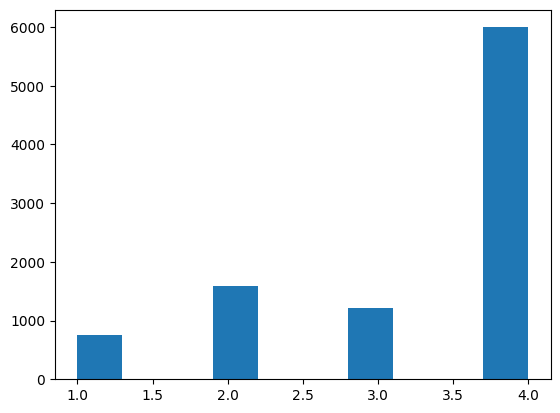

In [39]:
plt.hist(train['Target'])
plt.show()

<AxesSubplot: xlabel='Target', ylabel='count'>

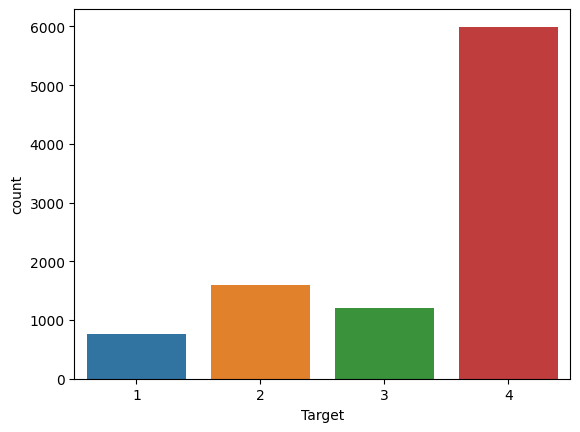

In [40]:
import seaborn as sns

sns.countplot(x='Target', data=train)


<AxesSubplot: >

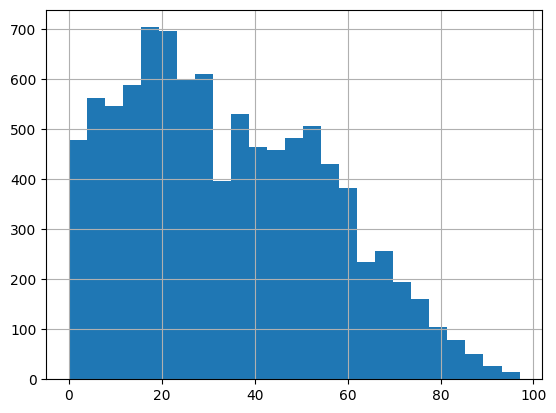

In [41]:
train['age'].hist(bins=25)
# Pico entre 15 e 25 anos, a partir disso tem uma queda gradual
# Nossa amostra entao pode ser composta principalmente por famílias com crianças e jovens adultos.

<AxesSubplot: xlabel='Target', ylabel='count'>

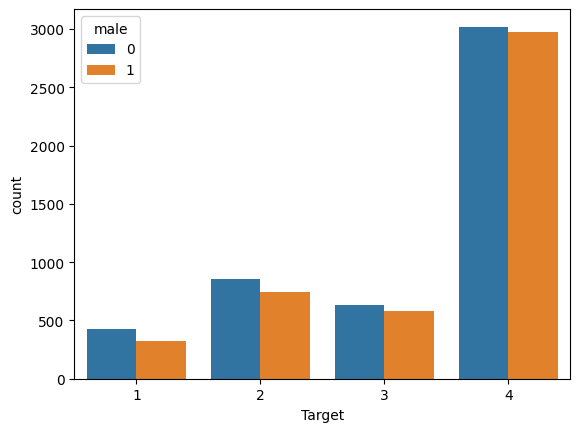

In [42]:
import seaborn as sns

sns.countplot(x='Target', hue='male', data=train)


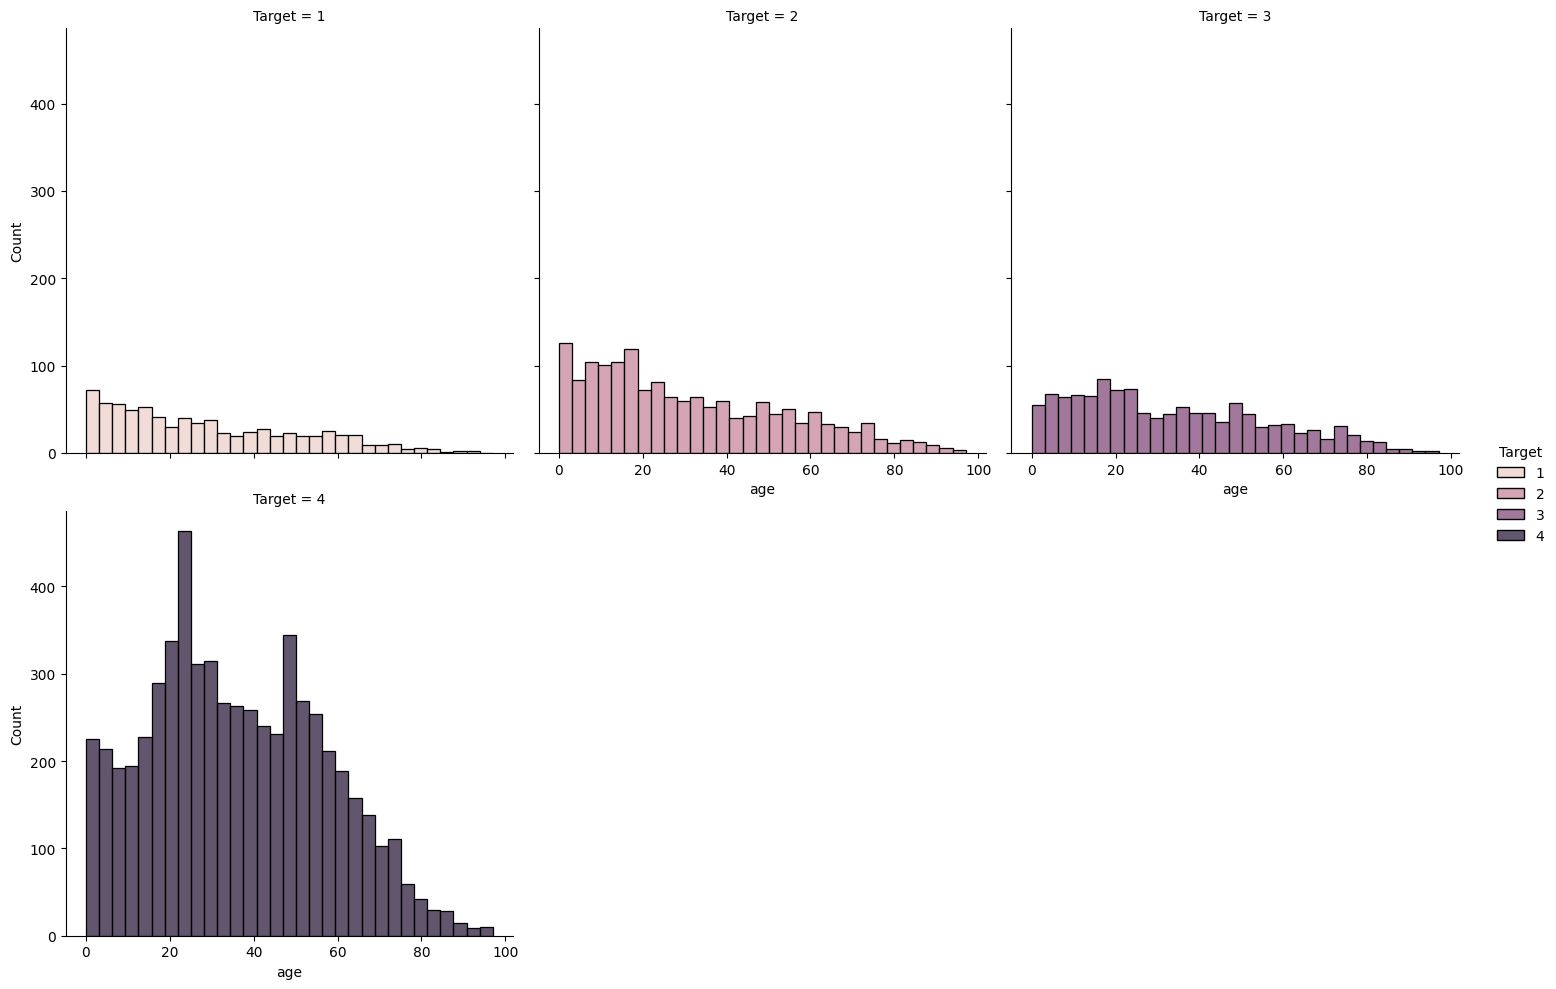

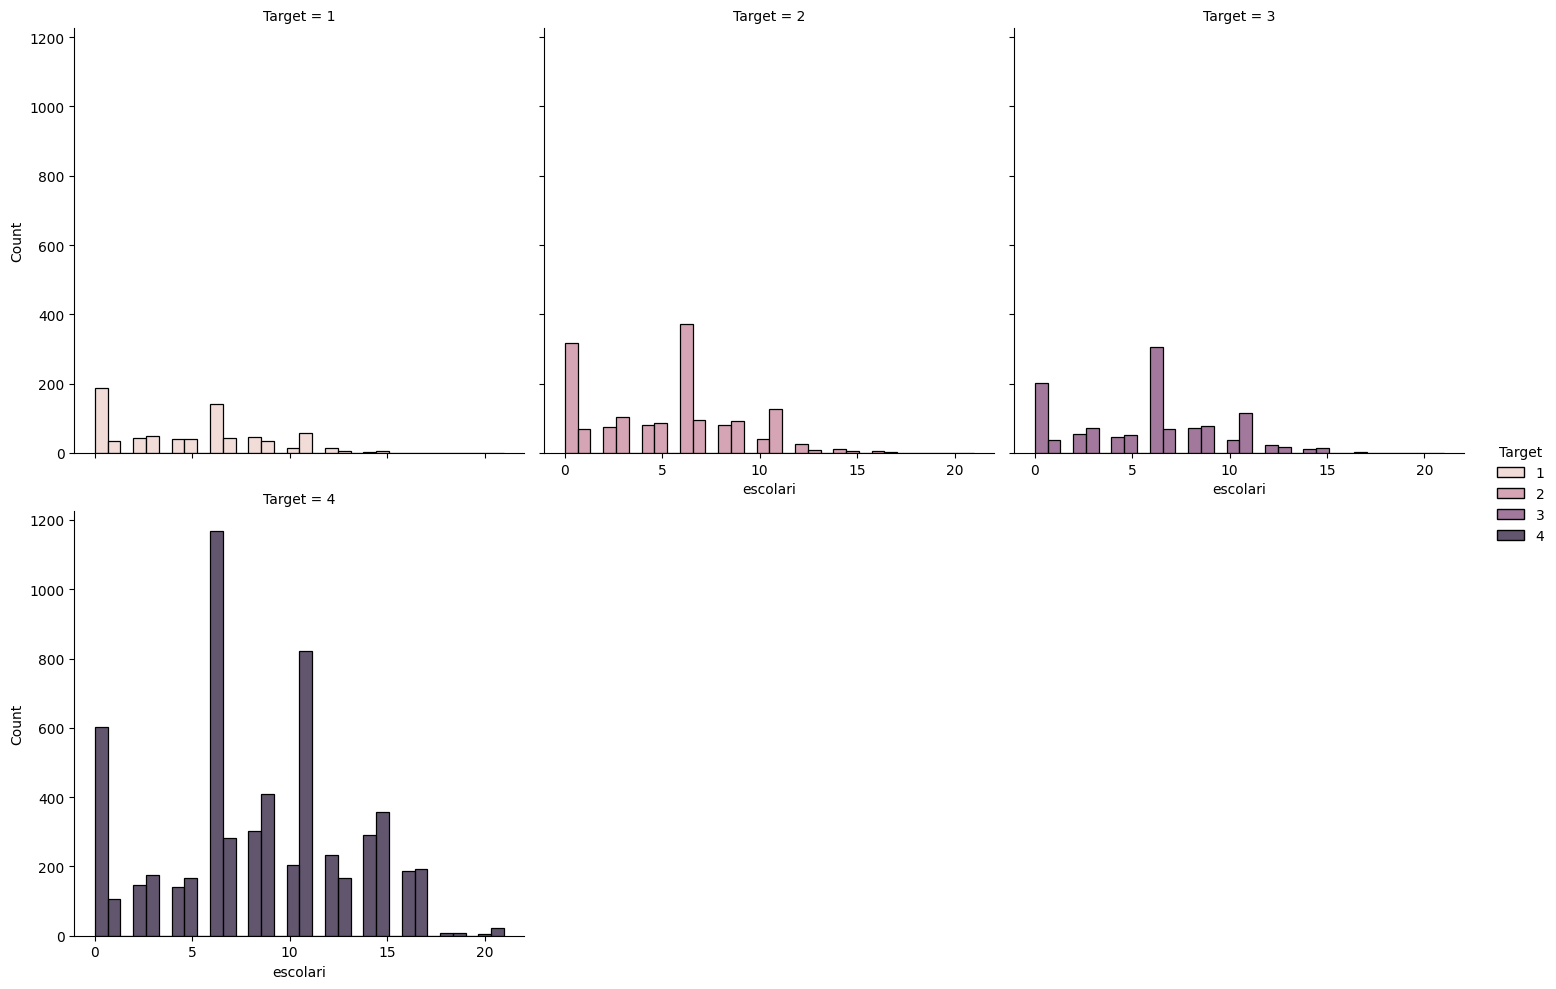

In [43]:
sns.displot(train, x='age', hue='Target', multiple='stack', col='Target', col_wrap=3)
plt.show()

# Distribuição da variável alvo por escolaridade
sns.displot(train, x='escolari', hue='Target', multiple='stack', col='Target', col_wrap=3)
plt.show()

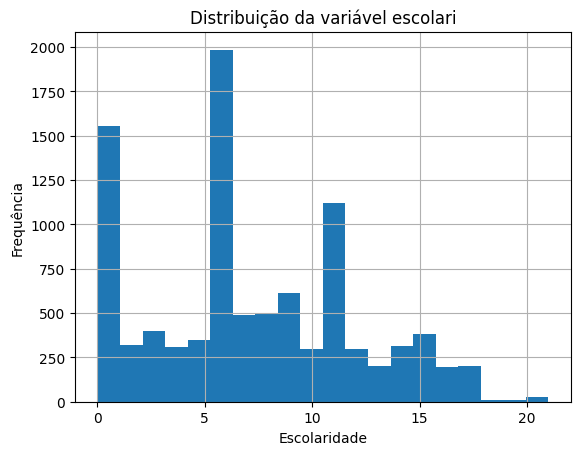

In [44]:
# criar um histograma para a variável "escolari"
train["escolari"].hist(bins=20)
plt.title("Distribuição da variável escolari")
plt.xlabel("Escolaridade")
plt.ylabel("Frequência")
plt.show()


/tmp/ipykernel_36488/1577912634.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()


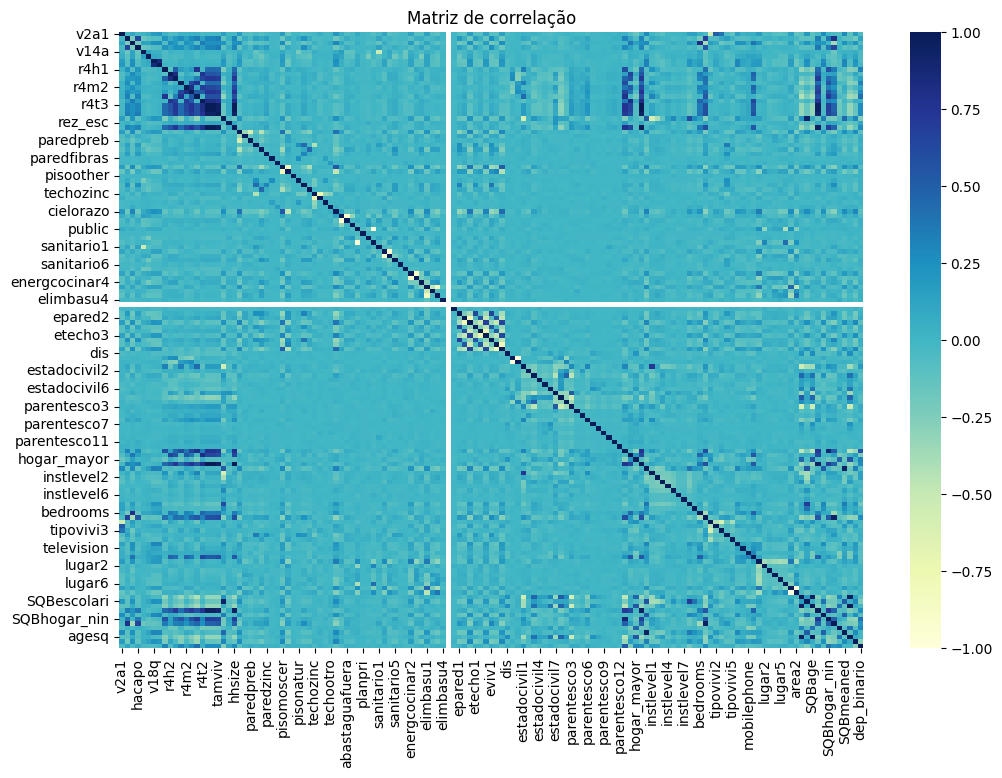

In [45]:
# criar uma matriz de correlação para todas as variáveis
corr_matrix = train.corr()

# plotar a matriz de correlação usando um mapa de calor
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap="YlGnBu")
plt.title("Matriz de correlação")
plt.show()


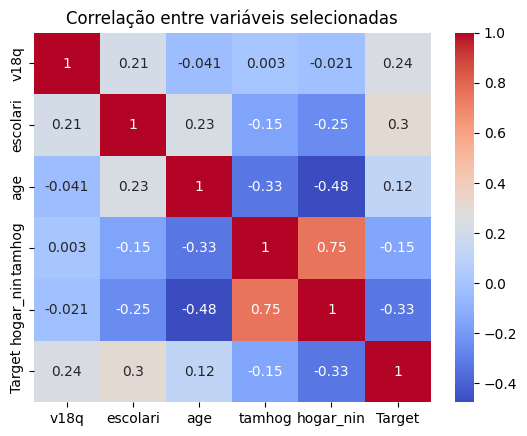

In [48]:
subset = ['v18q', 'escolari', 'age', 'tamhog', 'hogar_nin', 'Target']
corr_matrix = train[subset].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlação entre variáveis selecionadas')
plt.show()
